In [1]:
from hm_outlier import hm_outlier
import pandas as pd

In [2]:
data = pd.read_csv('./datasets/iris.csv',header=None,names=['sepal length','sepal width','petal length','petal width','species'])

In [3]:
data.head()

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df = data[data.columns[:-1]]
df.head()
df.shape

(150, 4)

In [5]:
iris_hm = hm_outlier(distance='euc',cutoff=2,n_points=1,approach='n')
iris_hm.fit(data = df.copy(deep=False))

In [6]:
len(iris_hm.outliers_index_)

6

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#print(iris_hm.outliers_)

In [9]:
#df1 = df.copy(deep=False)
#df1['outlier'] = pd.DataFrame(iris_hm.outliers_)
#df1.head()

In [10]:
#sns.pairplot(df1,hue='outlier')
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


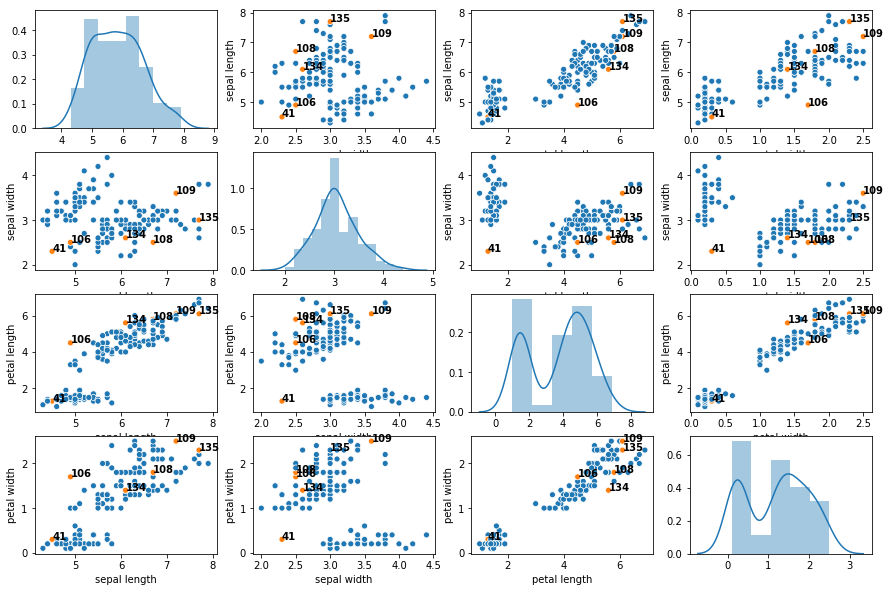

In [11]:
iris_hm.pair_plot()
##len(iris_hm.outliers_)

(150, 4)
0


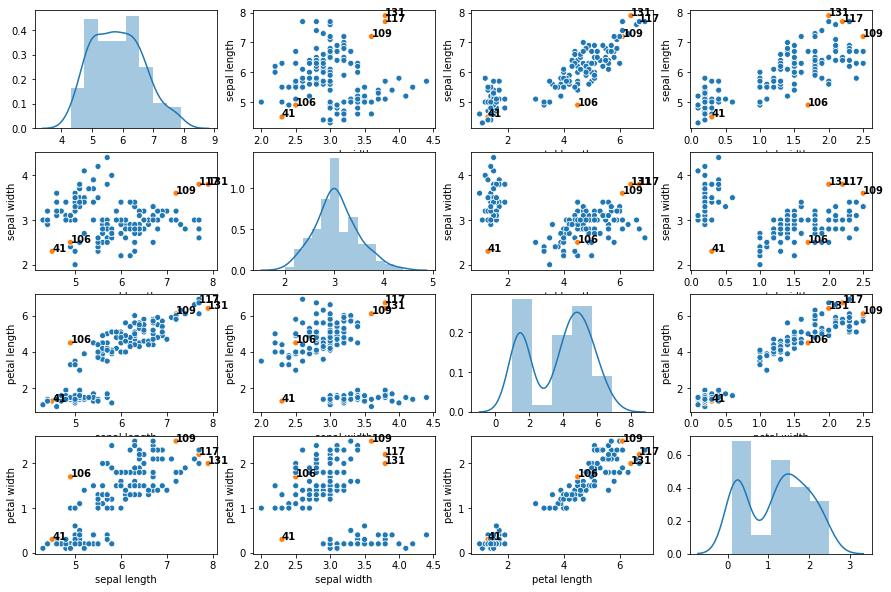

In [12]:
print(df.shape)
iris_hm2 = hm_outlier(distance='euc',cutoff=2,n_points=2,approach='n')
print(len(iris_hm2.outliers_))
iris_hm2.fit(data = df.copy(deep=False))
iris_hm2.pair_plot()

In [13]:
len(iris_hm2.outliers_)

150

In [14]:
iris_hm3 = hm_outlier(distance='euc',cutoff=2,n_points=3,approach='n')
iris_hm3.fit(data = df.copy(deep=False))
iris_hm3.pair_plot()

In [26]:
n_out = []
for i in range(1,df.shape[0]):
    iris_hm = []
    iris_hm = hm_outlier(distance='euc',cutoff=2,n_points=i,approach='n')
    iris_hm.fit(data = df.copy(deep=False))
    n_out.append(len(iris_hm.outliers_index_))

Text(0, 0.5, 'n outliers')

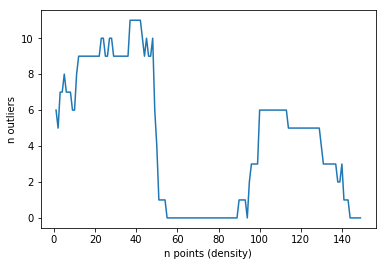

In [32]:
sns.lineplot(range(1,df.shape[0]),n_out)
plt.xlabel('n points (density)')
plt.ylabel('n outliers')

In [40]:
n_out = []
for i in range(10,40):
    iris_hm = []
    iris_hm = hm_outlier(distance='euc',cutoff=i/10,n_points=2,approach='n')
    iris_hm.fit(data = df.copy(deep=False))
    n_out.append(len(iris_hm.outliers_index_))

Text(0, 0.5, 'n outliers')

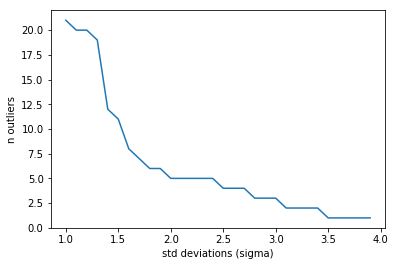

In [41]:
sns.lineplot([x/10 for x in range(10,40)],n_out)
plt.xlabel('std deviations (sigma)')
plt.ylabel('n outliers')